# 통계분석
## 범주형 데이터 (허가연도, 전파형식코드, 주파수, 시도) 를 중심으로 연관성 분석

In [135]:
# 필요한 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import chi2_contingency

# 고해상도 디스플레이 설정
%config InlineBackend.figure_format = 'retina'
# 폰트를 'Malgun Gothic'으로 설정
plt.rcParams['font.family'] = "Malgun Gothic"
# 마이너스 부호 깨짐 현상 해결
plt.rcParams["axes.unicode_minus"] = False

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# Seaborn 시각화 패키지 임포트
import seaborn as sns
sns.set(font="Malgun Gothic",             # 폰트 설정
        rc={"axes.unicode_minus":False},  # 마이너스 부호 깨짐 현상 방지
        style="white")                    # 테마

In [137]:
df = pd.read_excel('마을방송무선국.xlsx')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14283 entries, 0 to 14282
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   허가번호     14283 non-null  int64  
 1   허가연도     14283 non-null  int64  
 2   무선국 호출명  14275 non-null  object 
 3   시설자명     14273 non-null  object 
 4   전파형식코드   14283 non-null  object 
 5   주파수      14283 non-null  float64
 6   설치장소     14283 non-null  object 
 7   시도       14283 non-null  object 
 8   시군구      14283 non-null  object 
 9   위도       14283 non-null  float64
 10  경도       14283 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


### 1. 범주형 컬럼 지정

In [141]:
# 범주형으로 지정할 컬럼들
categorical_columns = ['허가연도', '전파형식코드', '주파수', '시도']

# 범주형으로 지정
for col in categorical_columns:
    df[col] = df[col].astype('category')

### 2. 교차표 (Crosstab) 생성
### 두 개 이상의 범주형 변수 간의 관계를 분석할 때 사용

In [36]:
# 예시: '허가연도'와 '전파형식코드' 간의 교차표
pd.crosstab(df['허가연도'], df['전파형식코드'], margins=True)

전파형식코드,4K00F1D,4K00F1E,4K00F1EJN,8K50F1D,8K50F1E,8K50F1EJN,8K50F3E,8K50F3EJN,All
허가연도,,,,,,,,,
2011,0,0,0,0,1,0,0,0,1
2012,0,26,0,0,1,0,1,0,28
2013,0,1,0,0,0,0,81,0,82
2014,0,11,0,0,6,0,376,0,393
2015,3,157,0,0,5,0,480,6,651
2016,17,206,0,4,55,0,616,0,898
2017,32,814,95,0,46,0,425,1,1413
2018,8,1794,101,0,167,1,260,1,2332
2019,3,1991,0,2,83,0,0,0,2079


## 3. 카이제곱 검정 (Chi-square Test)

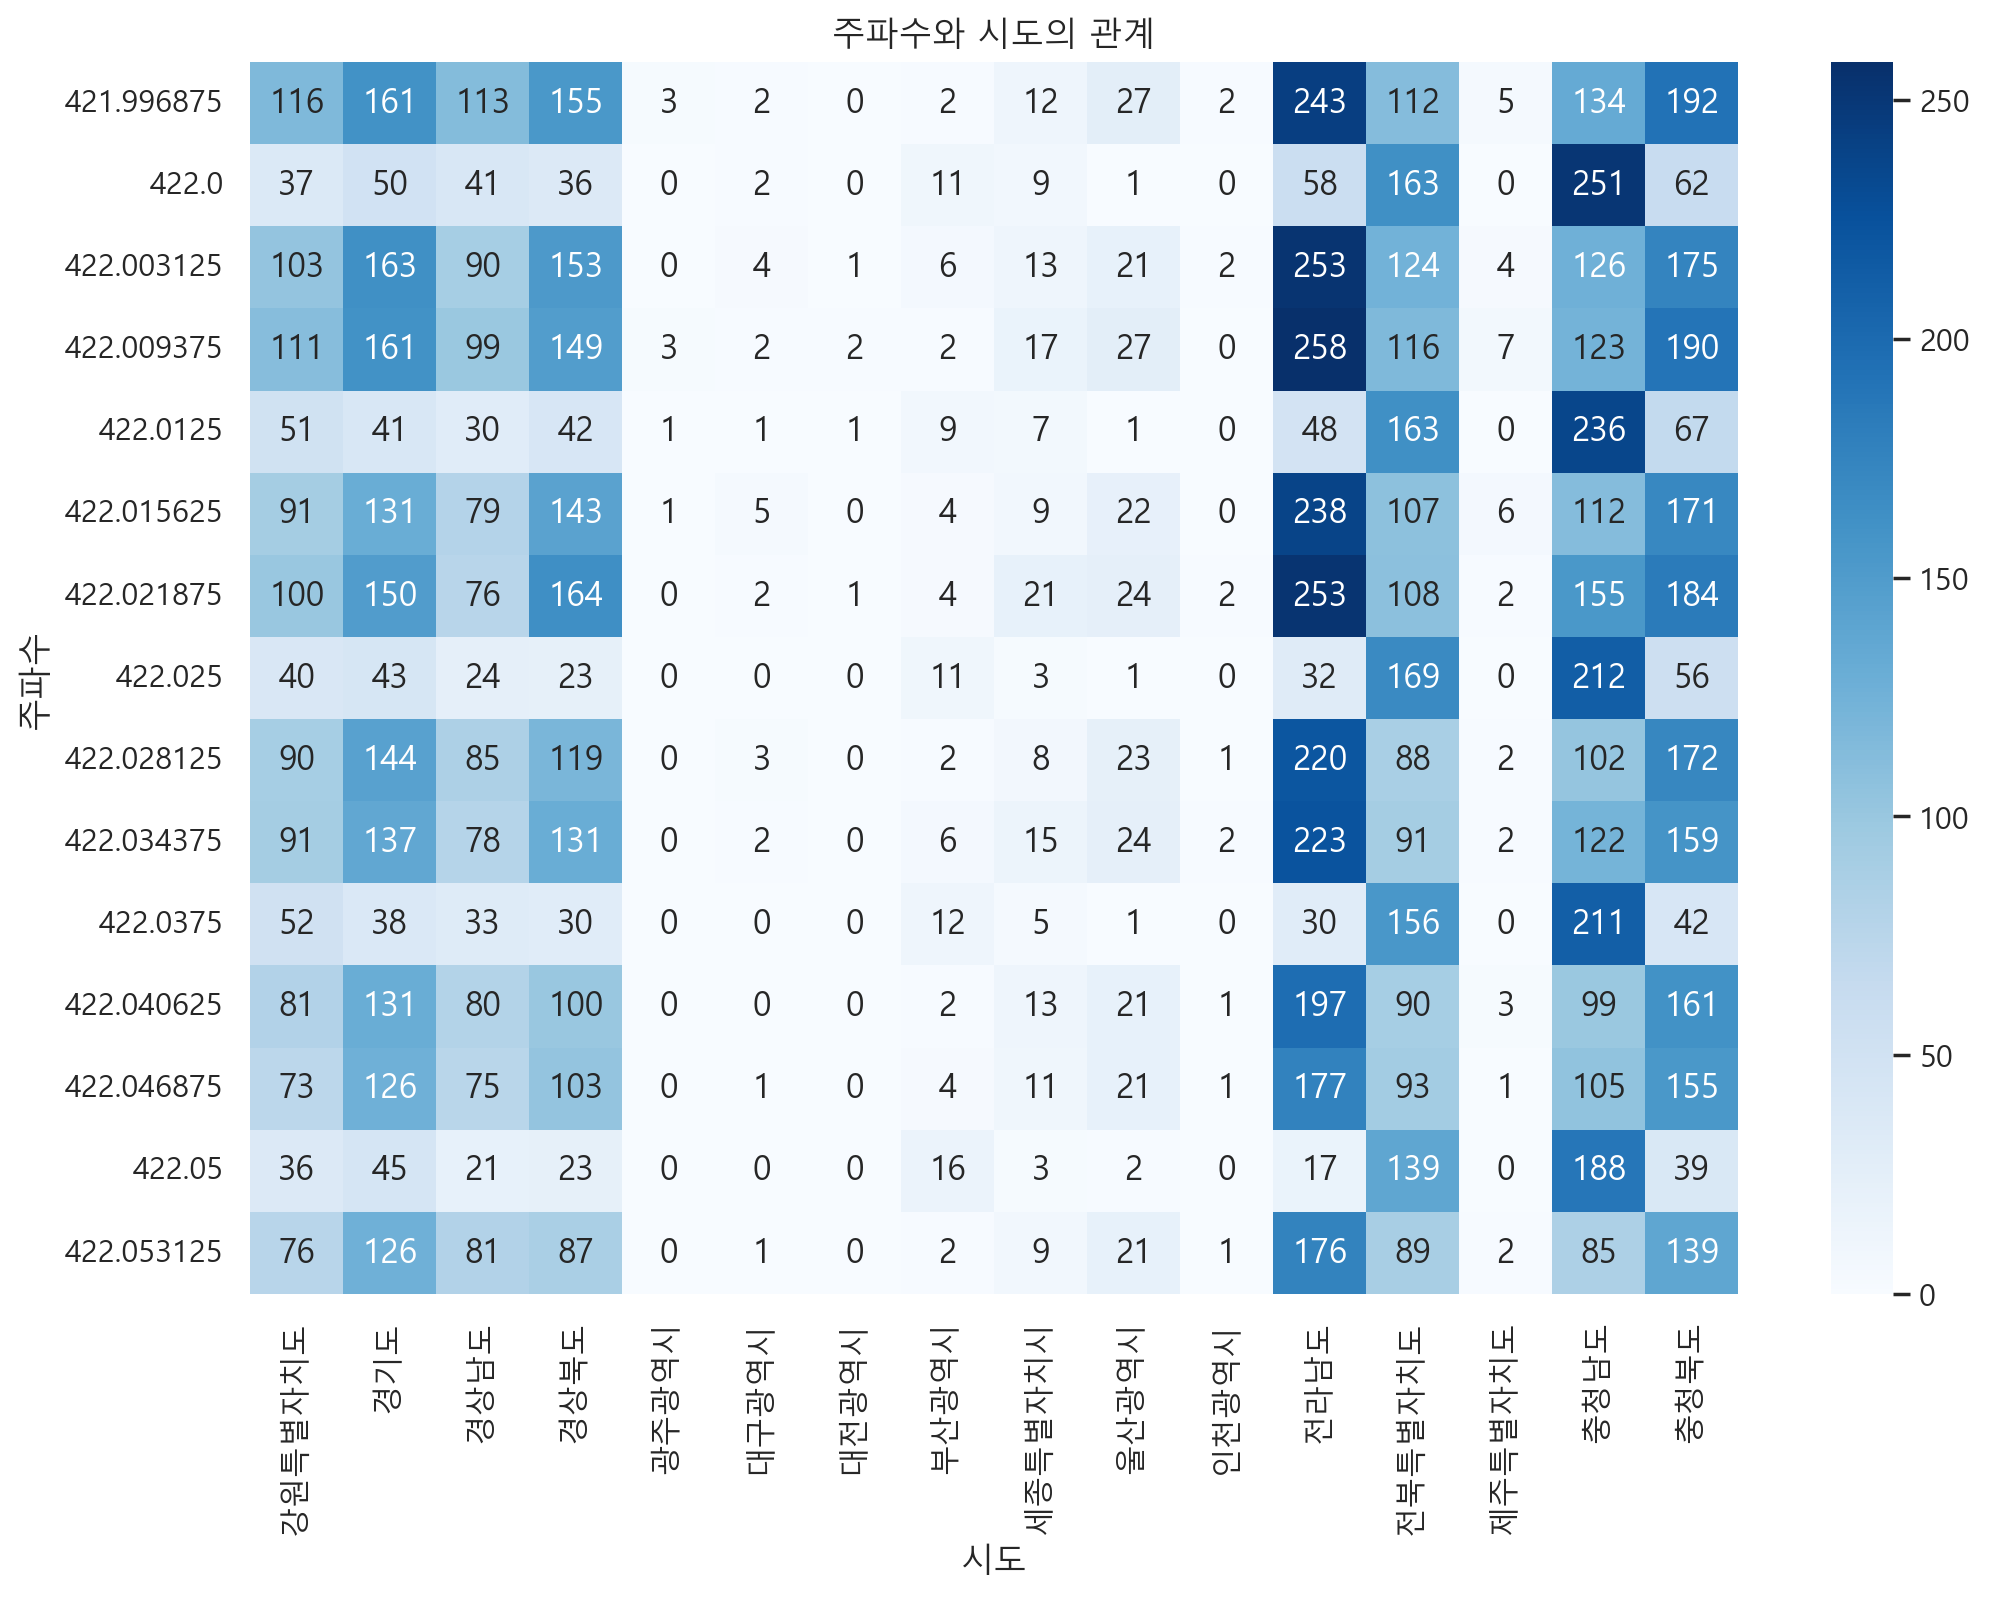

In [68]:
# 교차표 계산
contingency_table = pd.crosstab(df['주파수'], df['시도'])

# 히트맵 생성
plt.figure(figsize=(12, 8))  # 플롯 크기 지정
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=True)

# 제목 추가
plt.title('주파수와 시도의 관계')

# 플롯 보여주기
plt.show()

### 4. 반복문 자동화

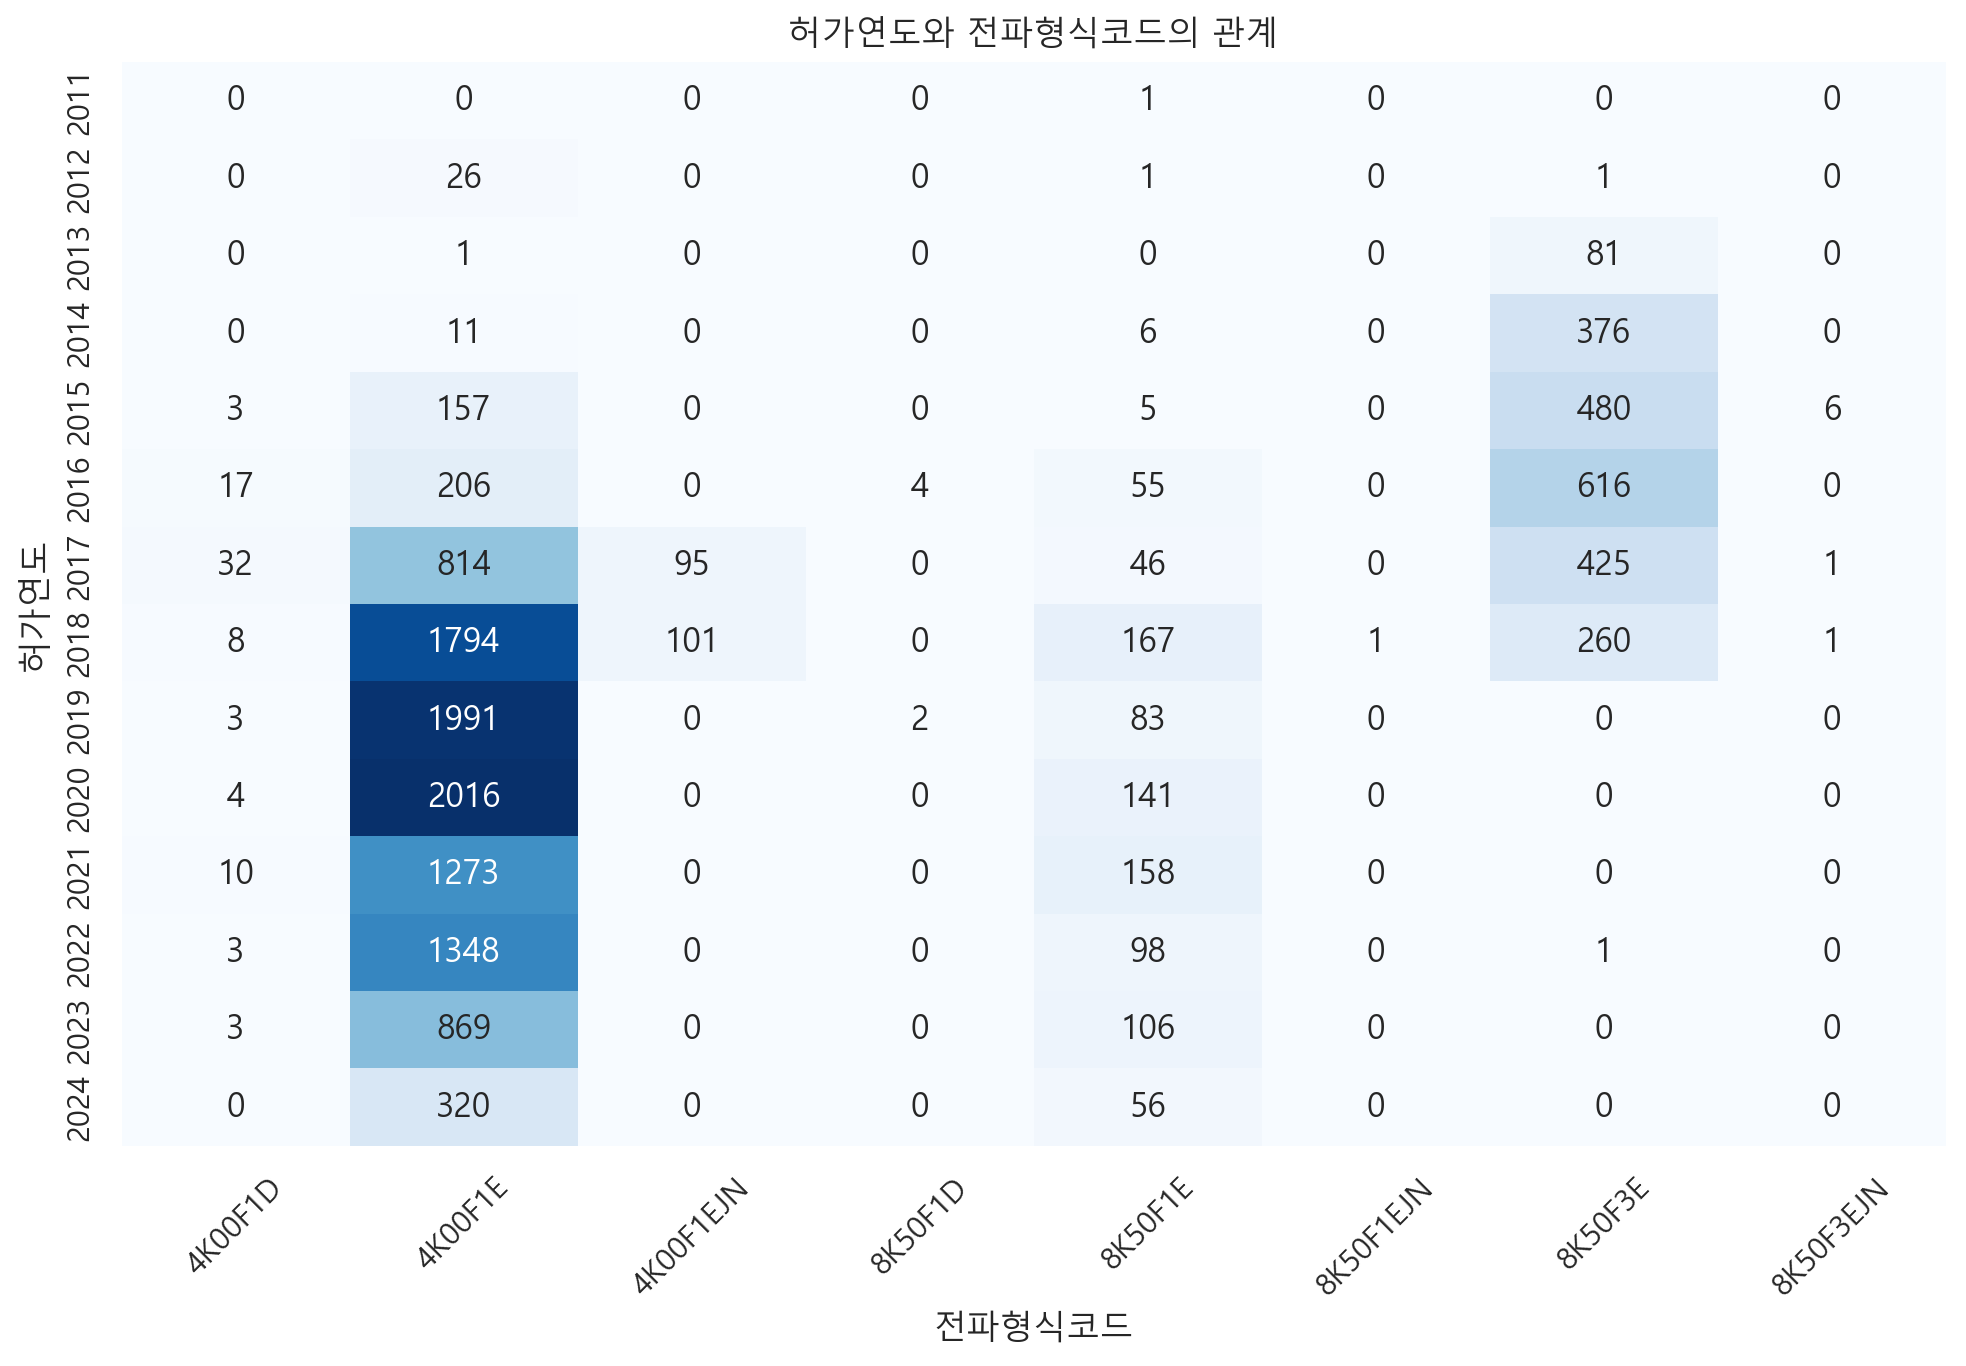

Chi2 통계량: 8859.57226796228
P-값: 0.0
결론: 허가연도와 전파형식코드는 통계적으로 유의미한 관계가 있습니다 (p < 0.05, chi2 = 8859.57).




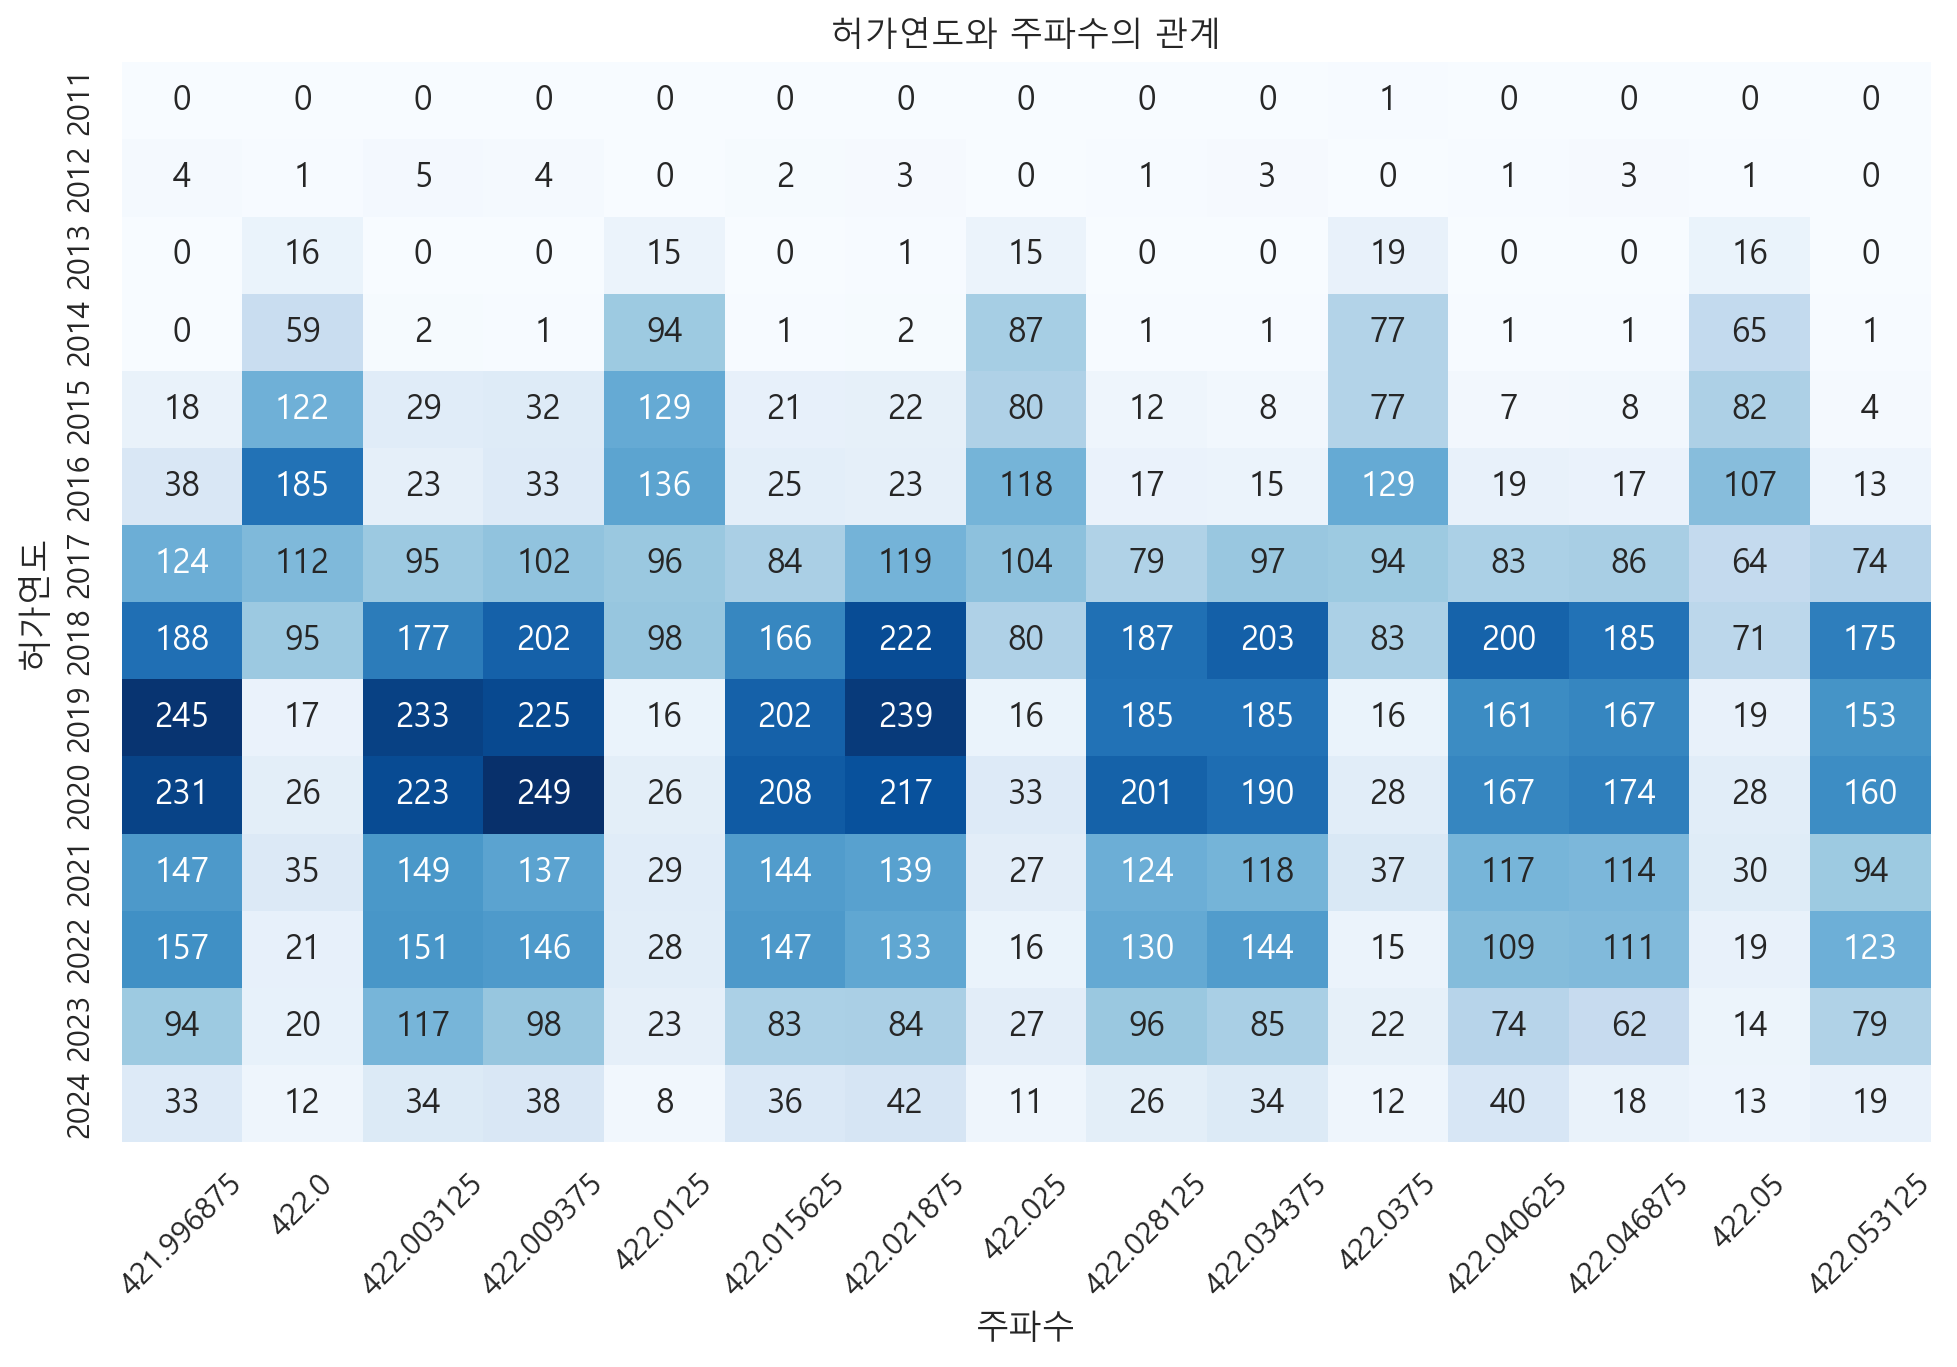

Chi2 통계량: 5578.519117621527
P-값: 0.0
결론: 허가연도와 주파수는 통계적으로 유의미한 관계가 있습니다 (p < 0.05, chi2 = 5578.52).




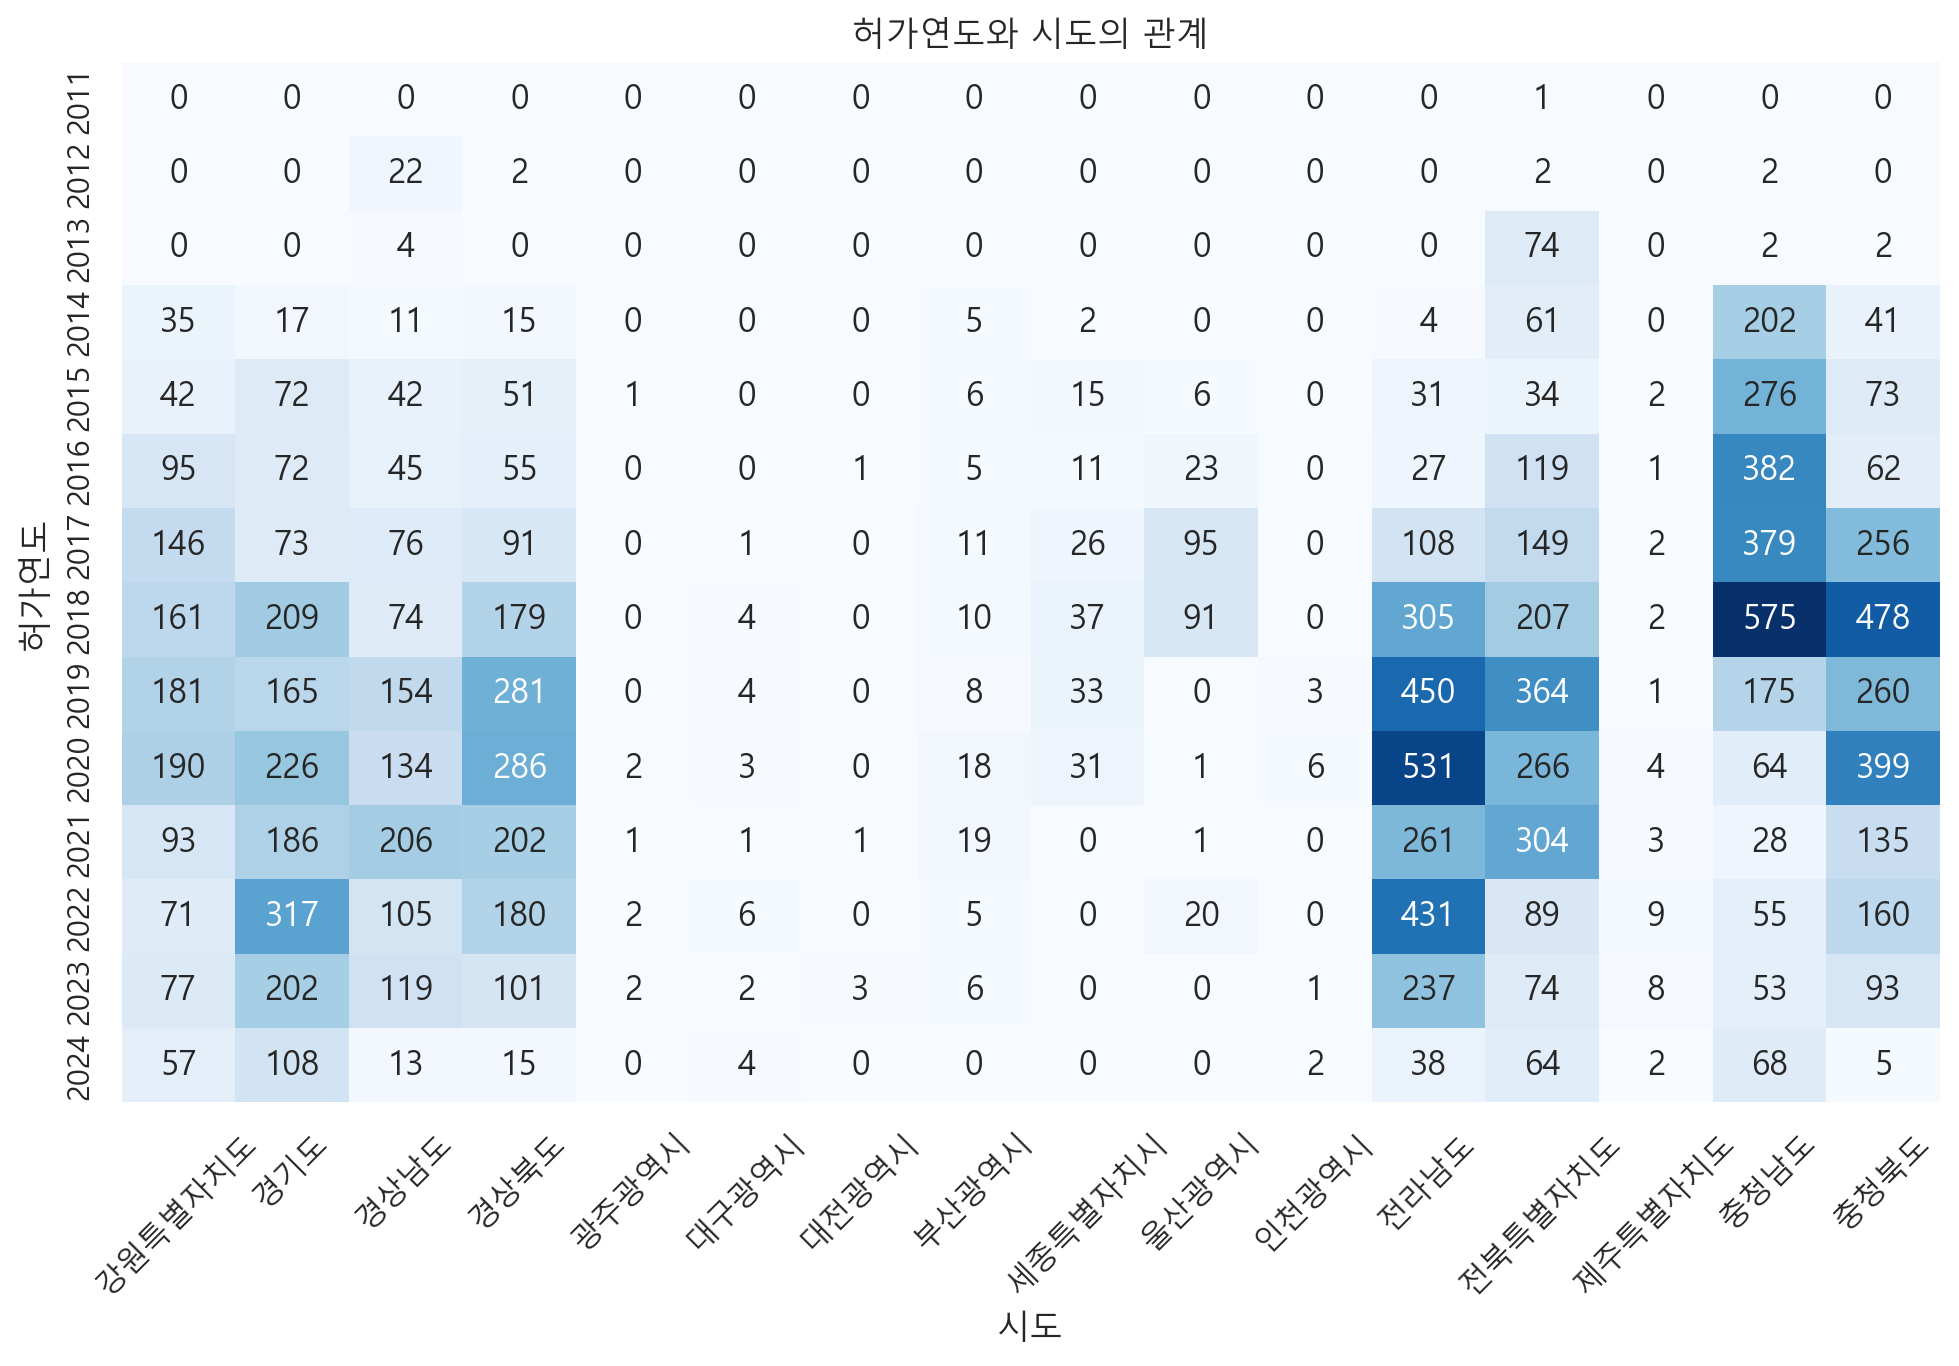

Chi2 통계량: 5193.824800392152
P-값: 0.0
결론: 허가연도와 시도는 통계적으로 유의미한 관계가 있습니다 (p < 0.05, chi2 = 5193.82).




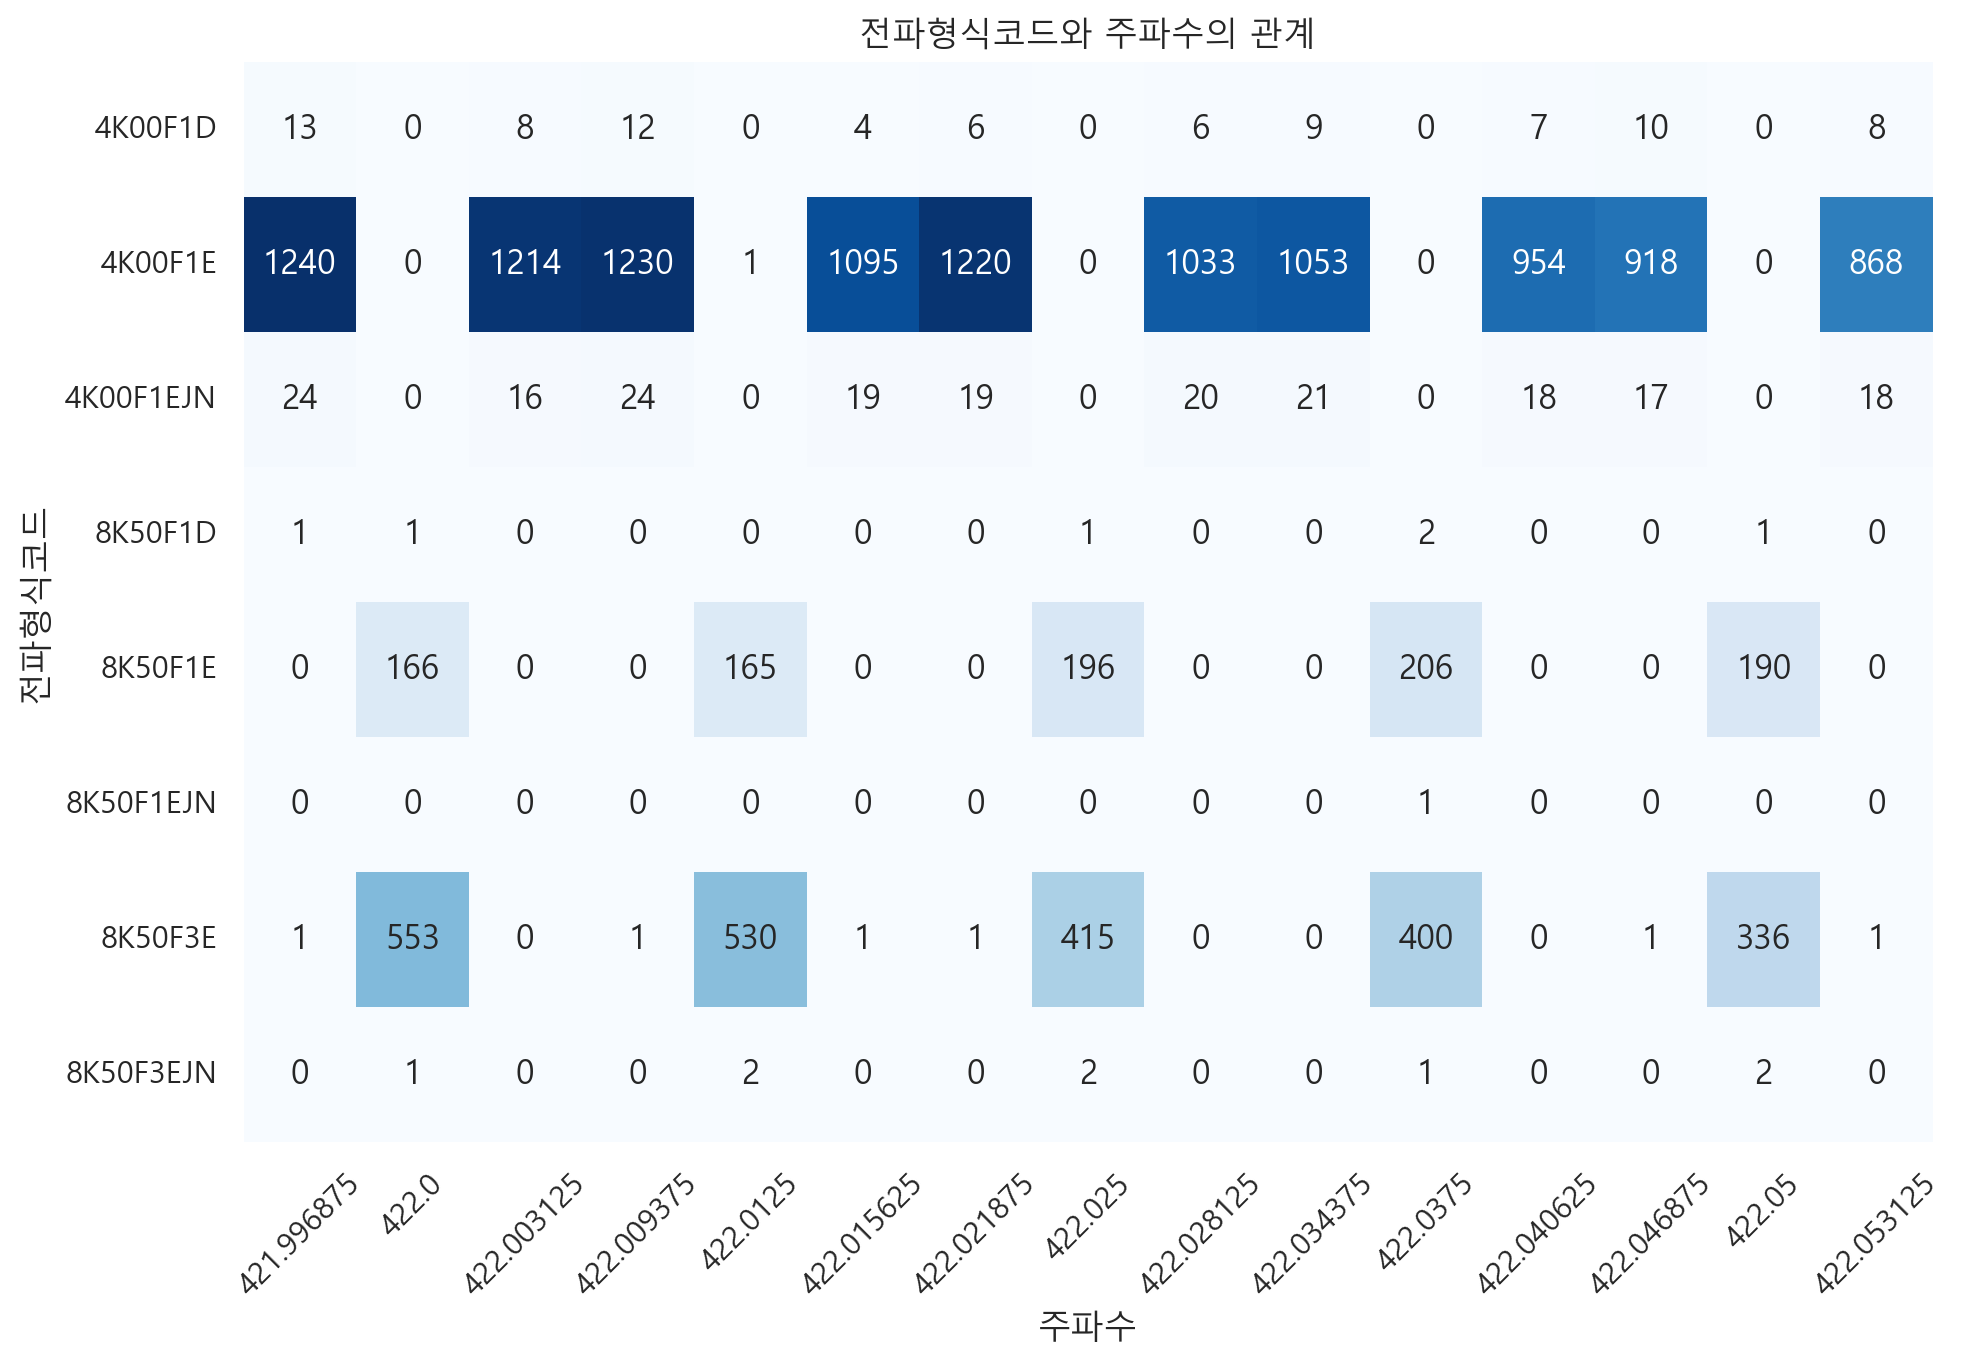

Chi2 통계량: 14484.834642505142
P-값: 0.0
결론: 전파형식코드와 주파수는 통계적으로 유의미한 관계가 있습니다 (p < 0.05, chi2 = 14484.83).




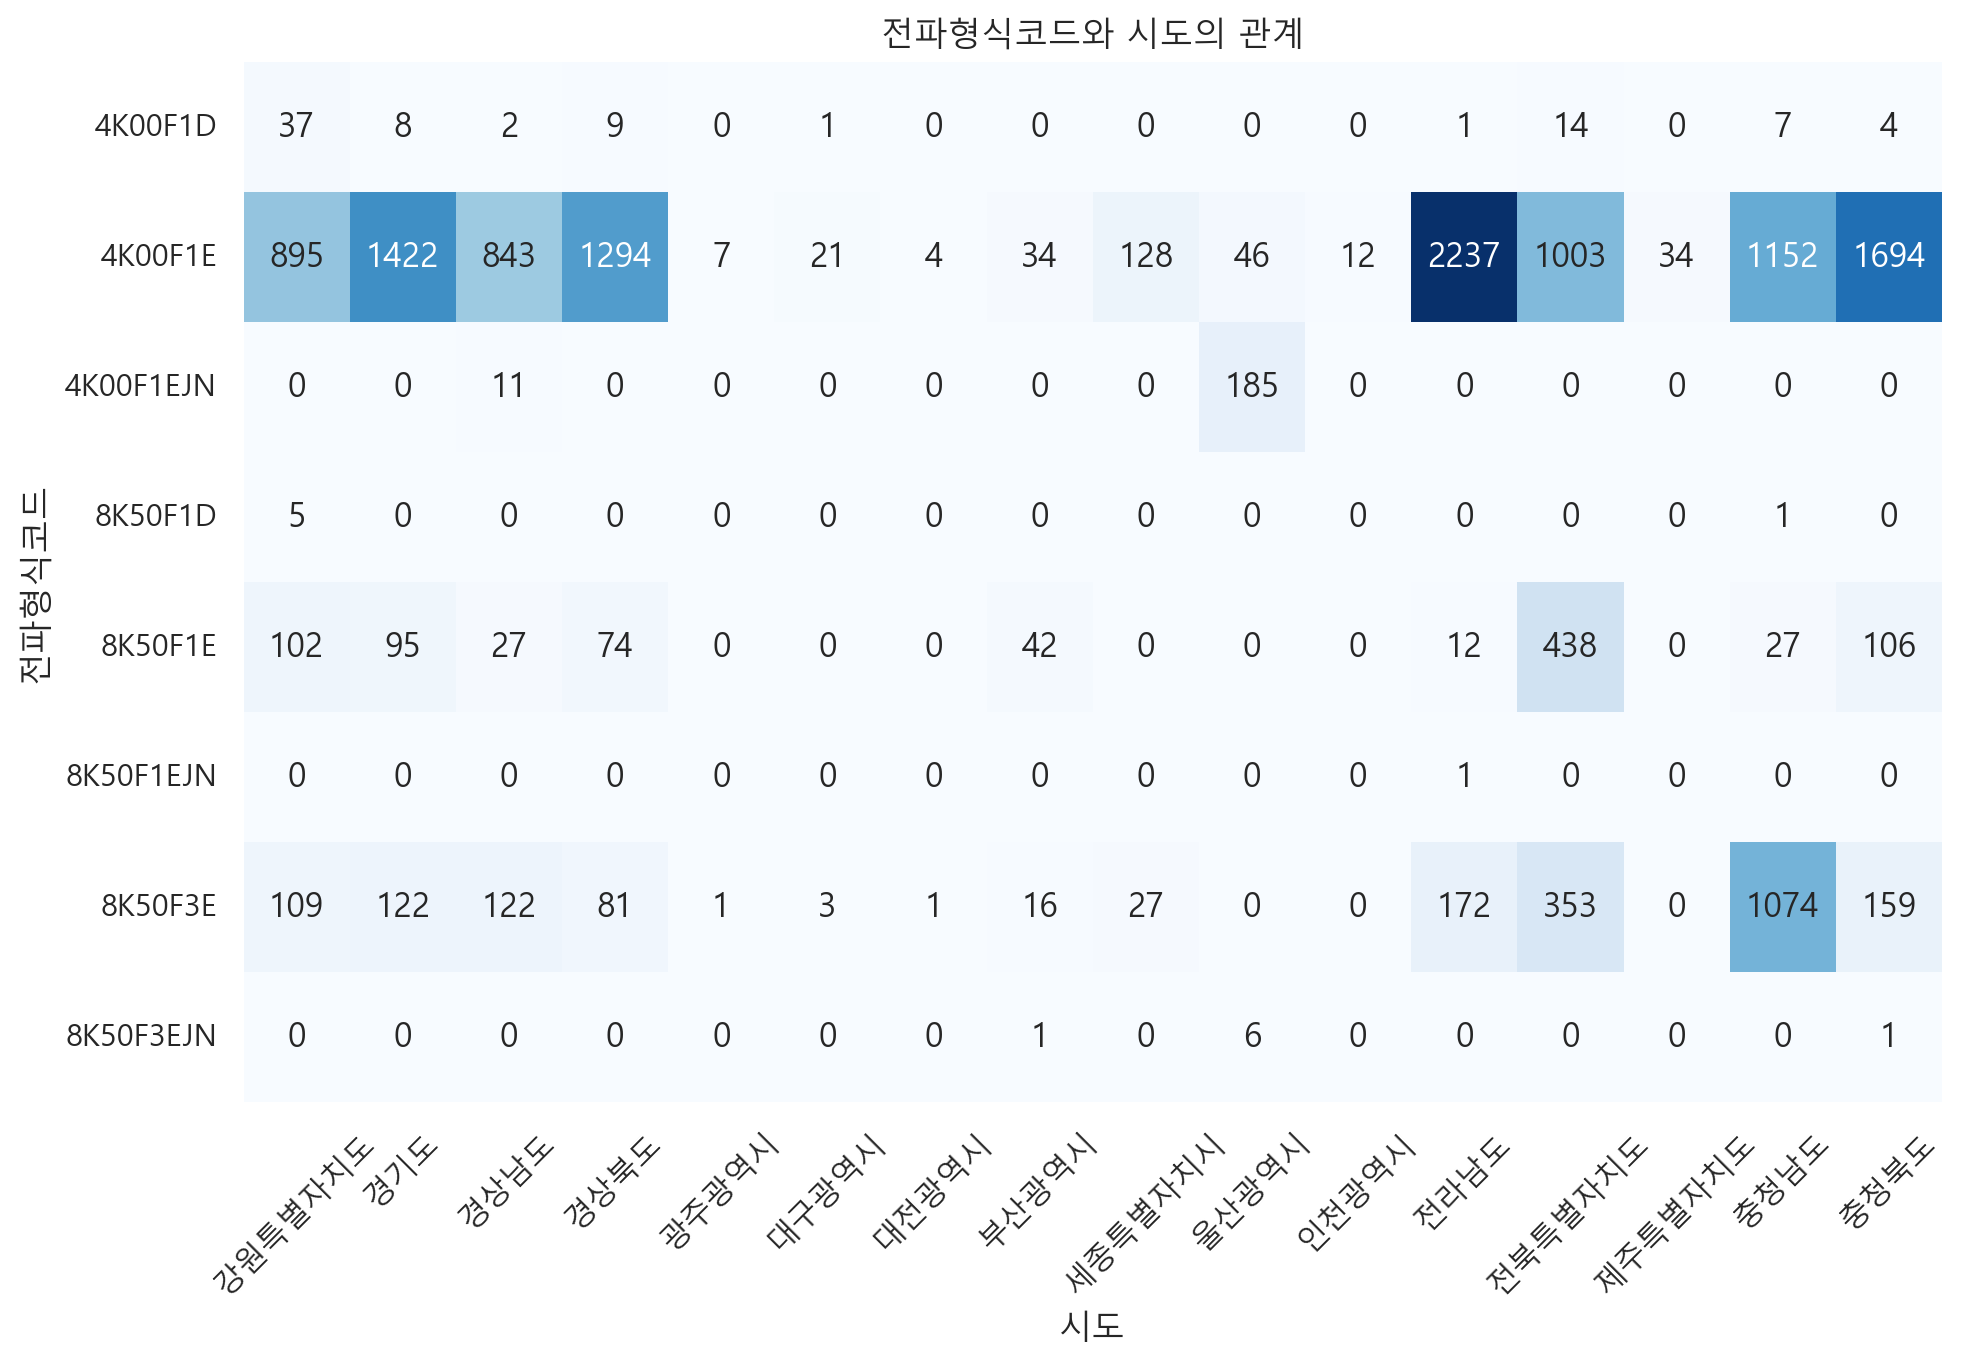

Chi2 통계량: 14740.80891420101
P-값: 0.0
결론: 전파형식코드와 시도는 통계적으로 유의미한 관계가 있습니다 (p < 0.05, chi2 = 14740.81).




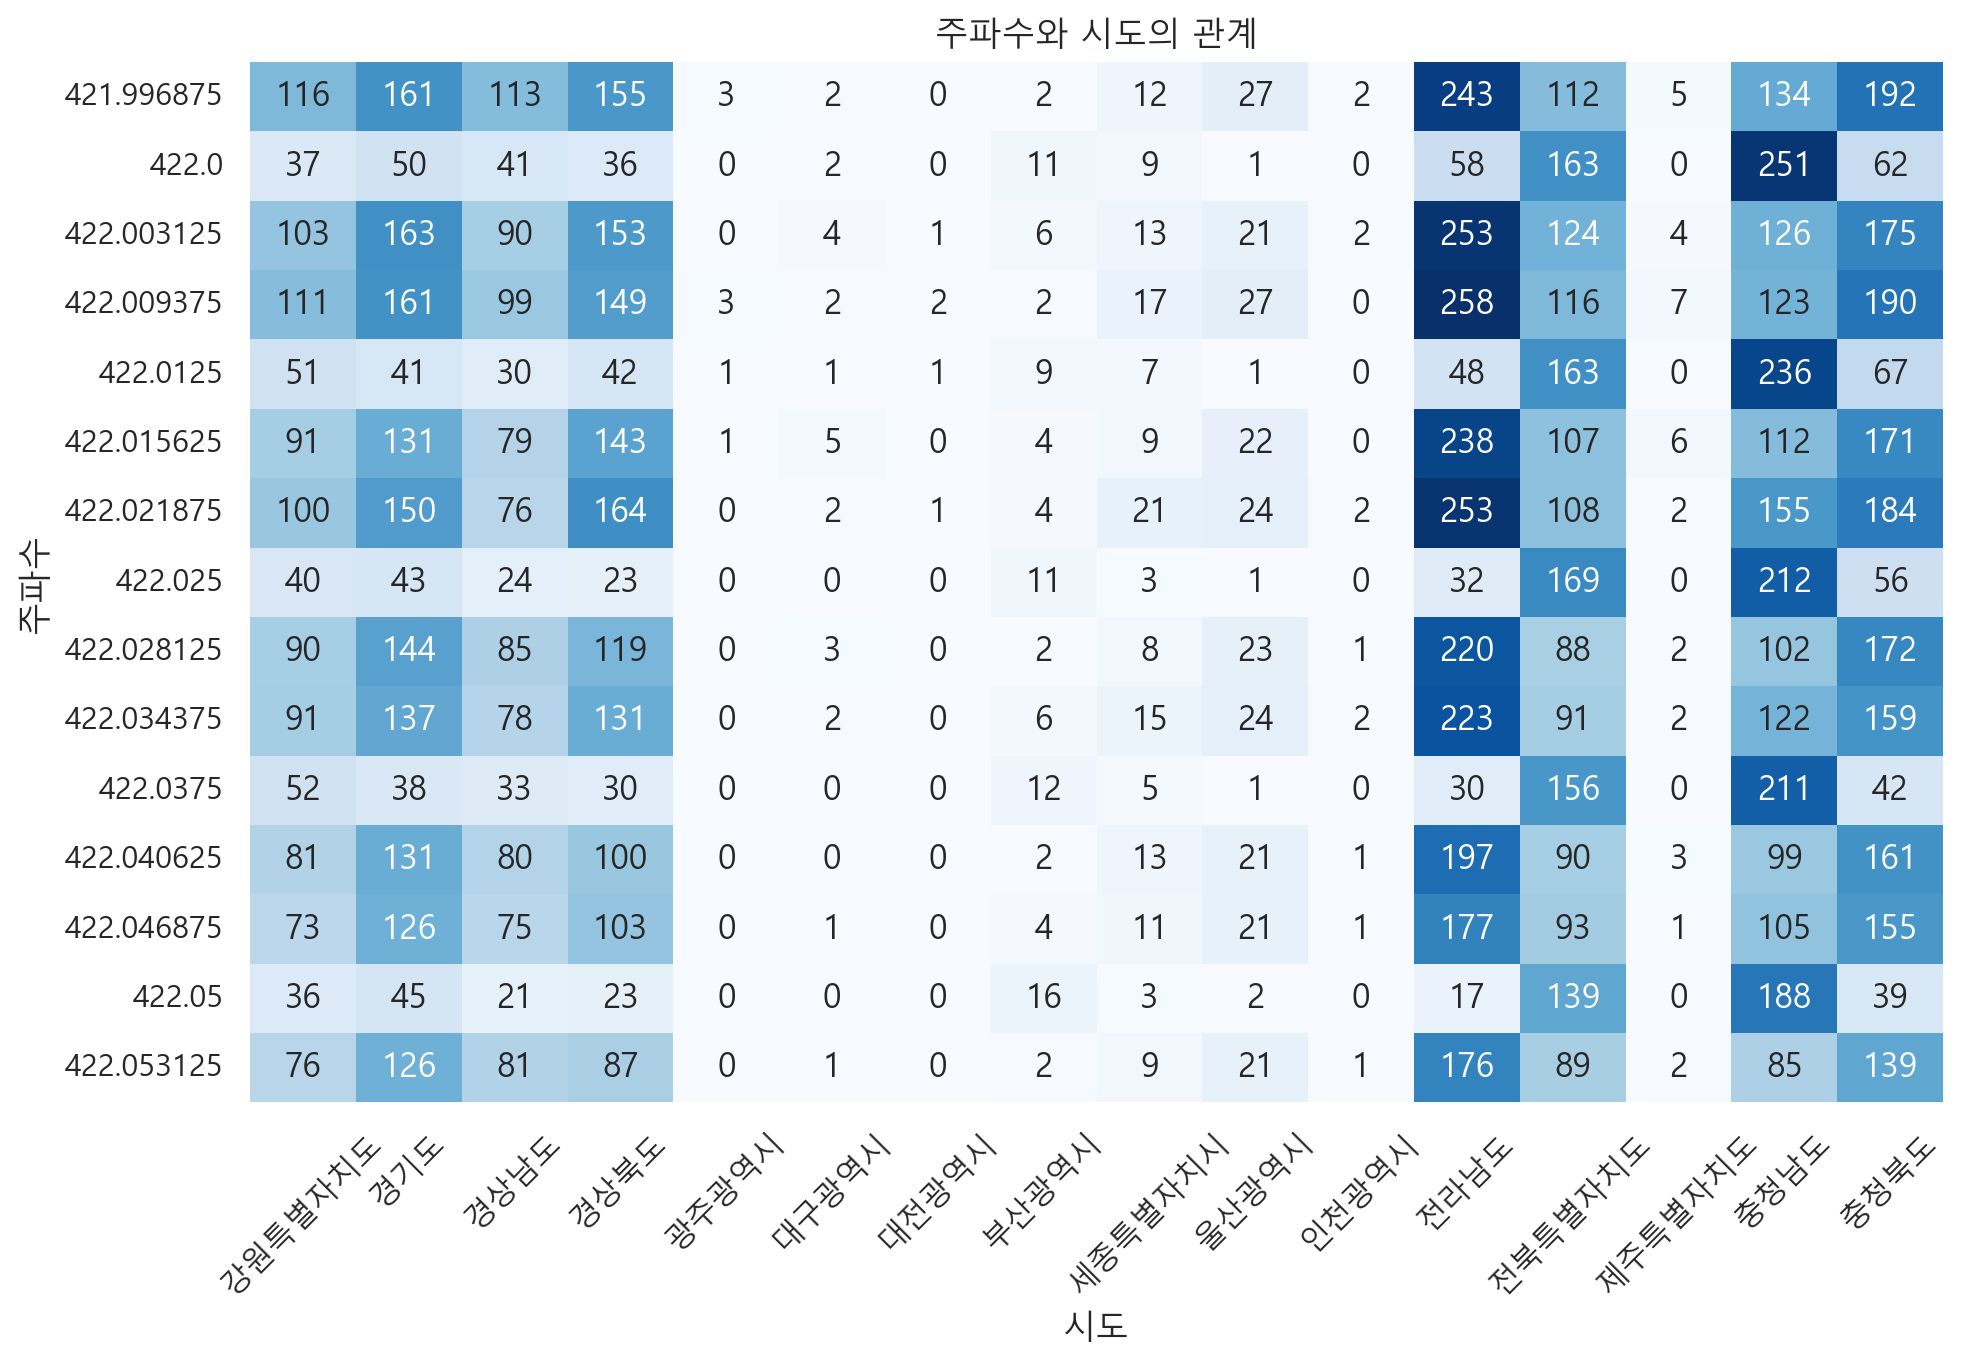

Chi2 통계량: 2334.36052694129
P-값: 0.0
결론: 주파수와 시도는 통계적으로 유의미한 관계가 있습니다 (p < 0.05, chi2 = 2334.36).




In [147]:
# 범주형 변수들을 추출합니다.
categorical_columns = ['허가연도', '전파형식코드', '주파수', '시도']

# 변수 쌍을 생성합니다 (2개씩)
combinations_list = combinations(categorical_columns, 2)

# 변수 쌍마다 반복문을 돌면서 작업을 합니다.
for col1, col2 in combinations_list:
    
    # 교차표 생성
    contingency_table = pd.crosstab(df[col1], df[col2])
    #print(f"교차표 (Contingency Table):\n{contingency_table}")
    
    # 히트맵 생성
    plt.figure(figsize=(10, 7))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xticks(rotation = 45)
    plt.title(f"{col1}와 {col2}의 관계")
    plt.tight_layout()
    plt.savefig(f"{col1}와 {col2}의 관계.png", dpi=400)
    plt.show()

    # 카이제곱 검정
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi2 통계량: {chi2}")
    print(f"P-값: {p}")

    # P-값과 Chi2 값에 따른 결론
    if p < 0.05 and chi2 > 10:  # 예시: chi2가 10보다 크고 p값이 0.05보다 작은 경우
        print(f"결론: {col1}와 {col2}는 통계적으로 유의미한 관계가 있습니다 (p < 0.05, chi2 = {chi2:.2f}).")
    elif p < 0.05:
        print(f"결론: {col1}와 {col2}는 통계적으로 유의미한 관계가 있습니다 (p < 0.05, chi2 = {chi2:.2f}).")
    else:
        print(f"결론: {col1}와 {col2}는 통계적으로 유의미한 관계가 없습니다 (p >= 0.05, chi2 = {chi2:.2f}).")

    print("=" * 100)
    print('\n')

    